A notebook for quickly plotting TDTR-measurement data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.data import beam, dataframe
from src.analysis import bidirectional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pathlib

In [ ]:
# Finding all the measurement data fitting the current measurement file pattern

files = [f for f in pathlib.Path().glob("../data/raw/*TEST*010825*.mat")]
list_data = [dataframe.Measurement(file) for file in files]
files

[WindowsPath('../data/raw/AlN-M3-1001-S1-TEST1@6000kHz_010825_104056.mat'),
 WindowsPath('../data/raw/AlN-M3-1001-S1-TEST2@6000kHz_010825_111537.mat'),
 WindowsPath('../data/raw/AlN-M3-1001-S1-TEST3@6000kHz_010825_114956.mat'),
 WindowsPath('../data/raw/AlN-M3-1001-S2-TEST1@6000kHz_010825_121649.mat'),
 WindowsPath('../data/raw/AlN-M3-1001-S2-TEST2@6000kHz_010825_123235.mat'),
 WindowsPath('../data/raw/AlN-M3-1001-S2-TEST3@6000kHz_010825_125407.mat'),
 WindowsPath('../data/raw/AlN-M3-1001-S3-TEST1@6000kHz_010825_131144.mat'),
 WindowsPath('../data/raw/AlN-M3-1001-S3-TEST2@6000kHz_010825_132517.mat'),
 WindowsPath('../data/raw/AlN-M3-1001-S3-TEST3@6000kHz_010825_134047.mat'),
 WindowsPath('../data/raw/AlN-M3-1002-S1-TEST1@6000kHz_010825_140309.mat')]

7.237000000000009
0.2447692594911993
---
SNR 31.6 dB
-0.23862500000000014
0.20009857412592516
---
SNR 32.3 dB
-0.13387500000000008
0.2251411919903849
---
SNR 31.1 dB
-0.014812500000000006
0.1795092563630528
---
SNR 33.2 dB
-0.008812500000000003
0.12933823583106255
---
SNR 36.1 dB
-0.014312500000000006
0.23939224995565536
---
SNR 31.2 dB
0.1387500000000001
0.11349569202607133
---
SNR 36.5 dB
-0.5340625000000006
0.15576974676225955
---
SNR 34.7 dB
0.1635625000000001
0.15955246266146797
---
SNR 34.5 dB
0.7535000000000008
0.139299441886846
---
SNR 36.0 dB


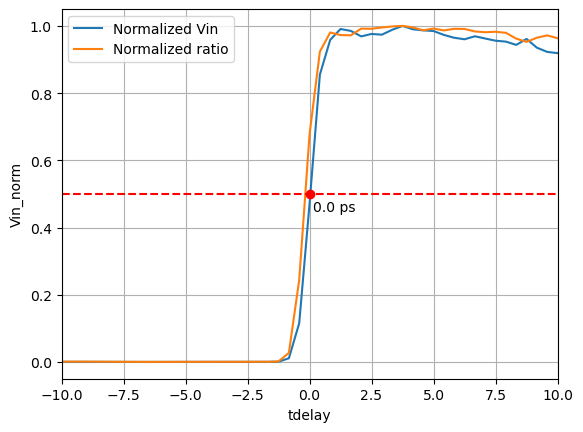

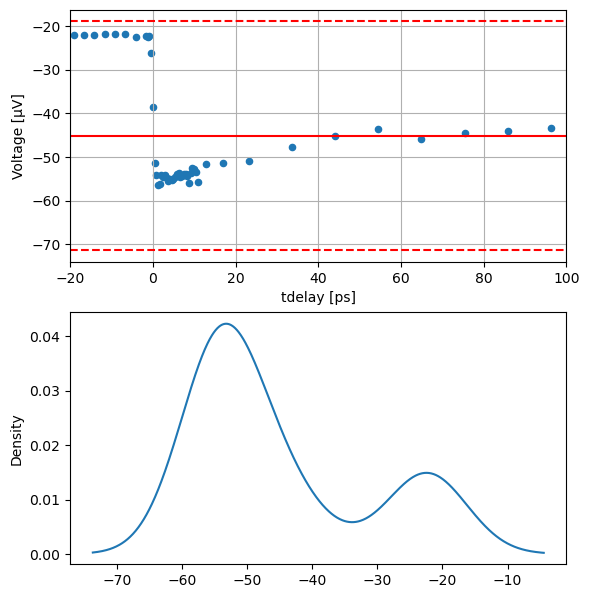

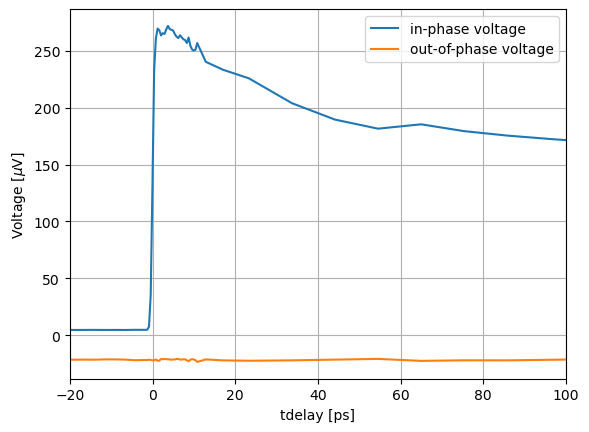

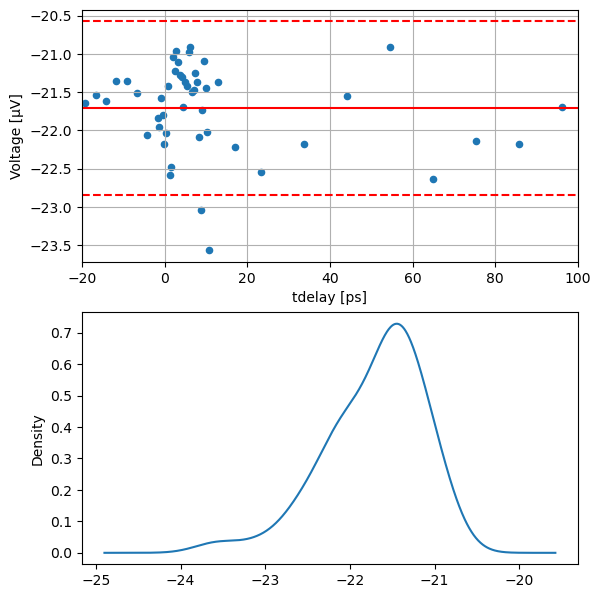

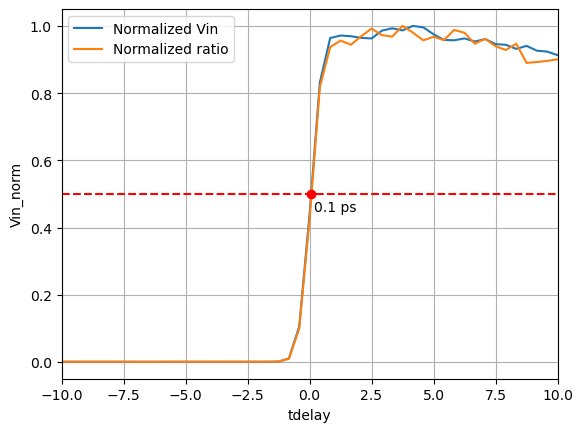

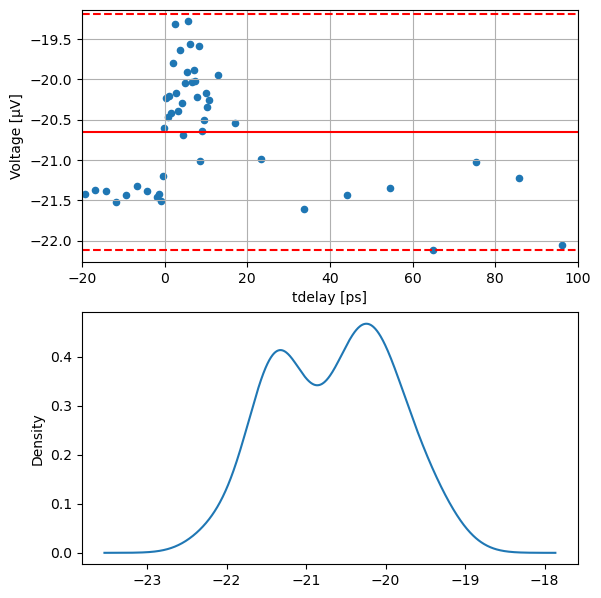

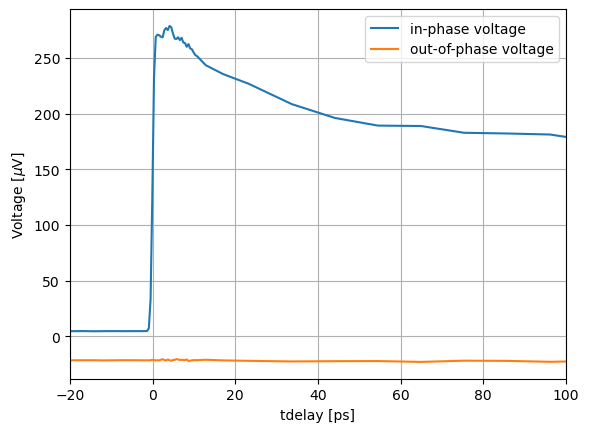

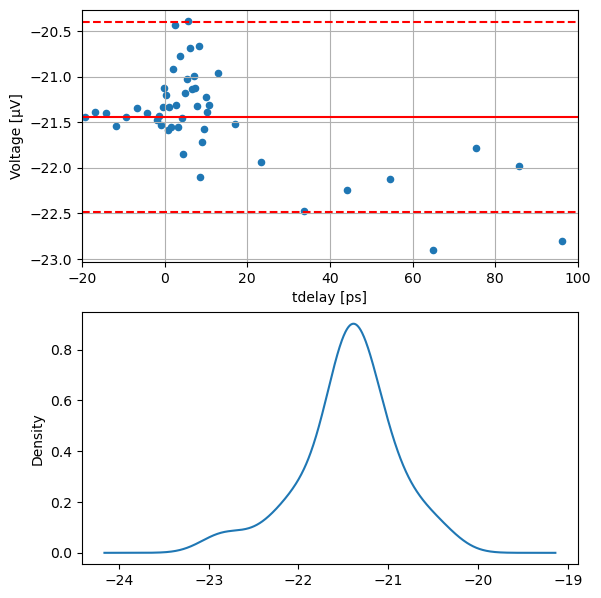

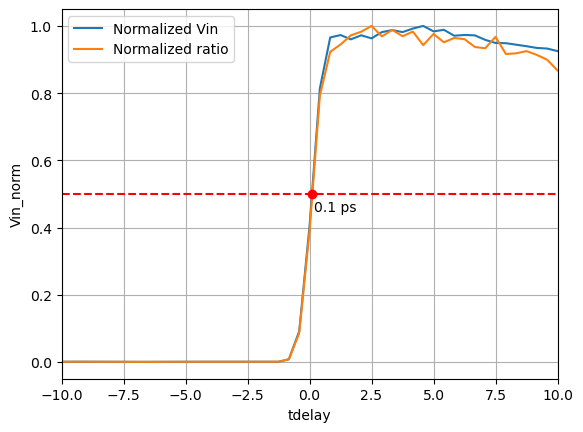

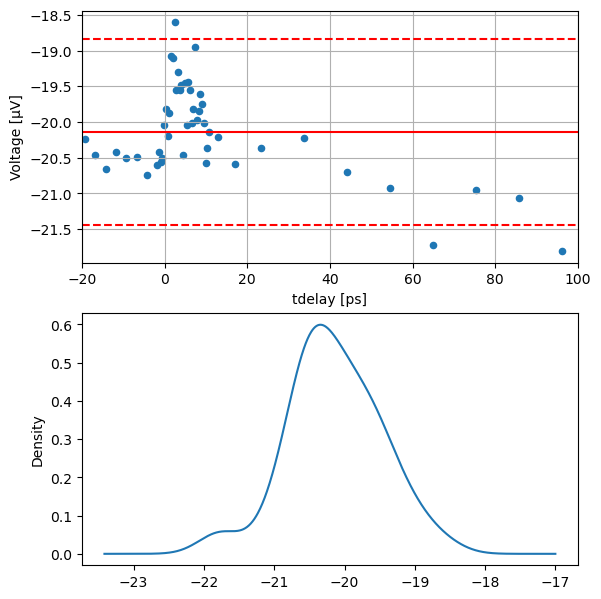

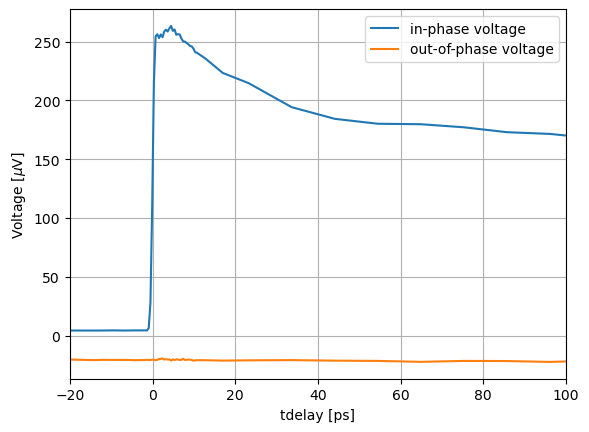

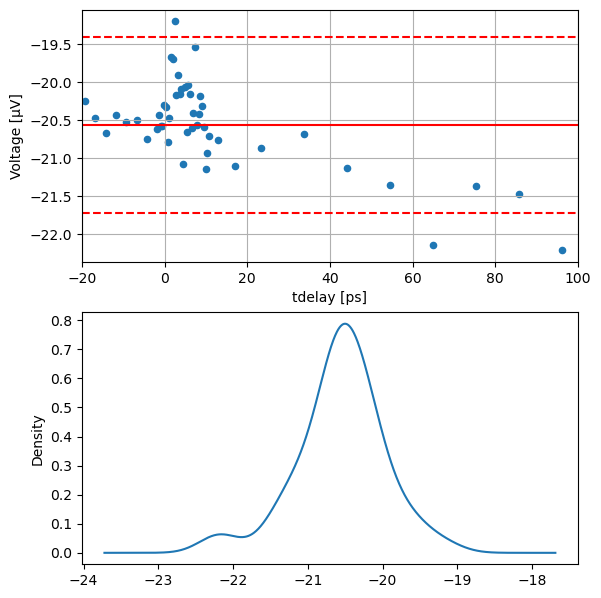

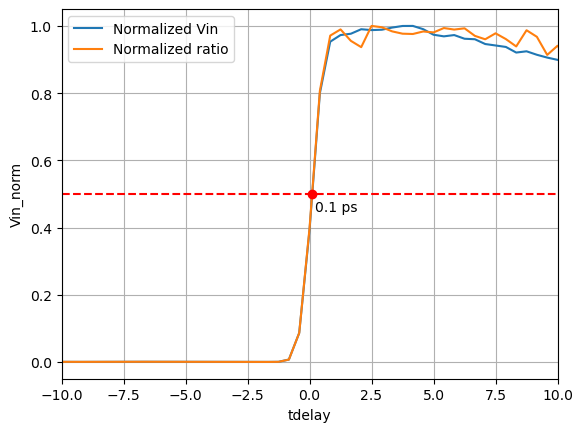

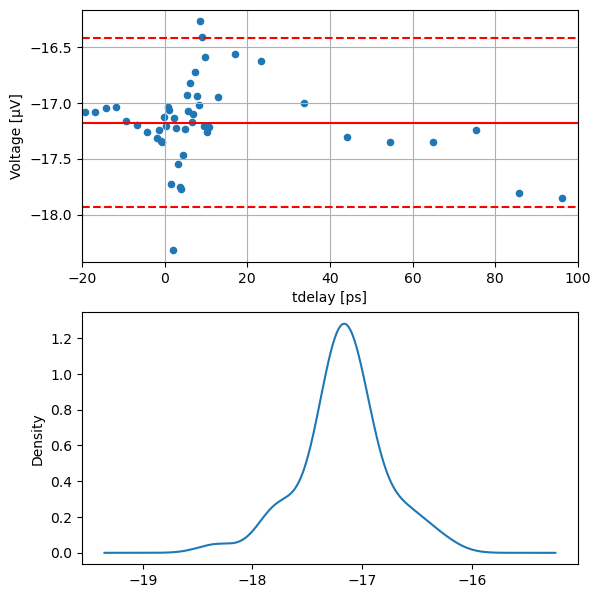

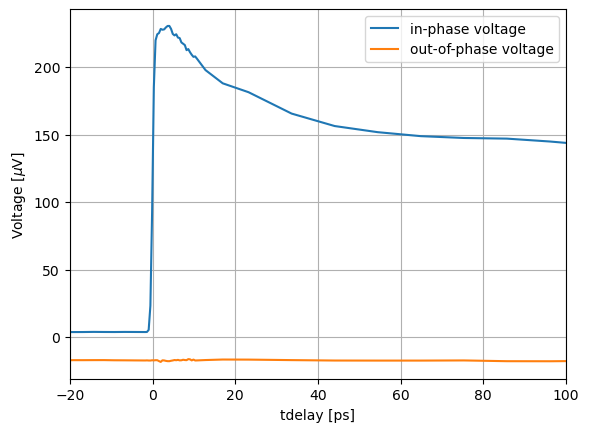

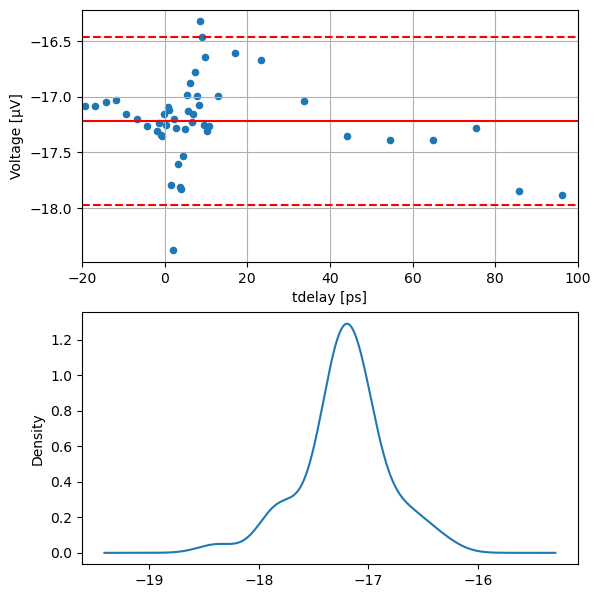

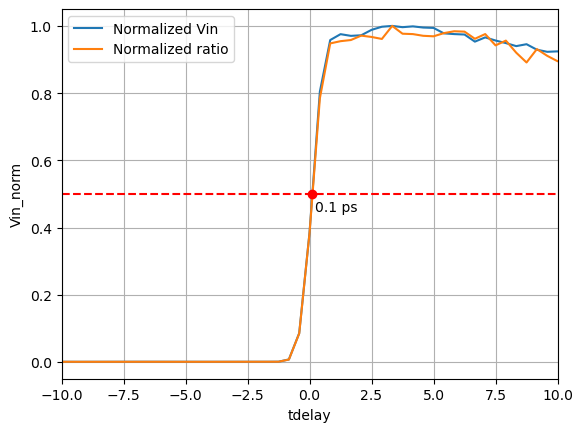

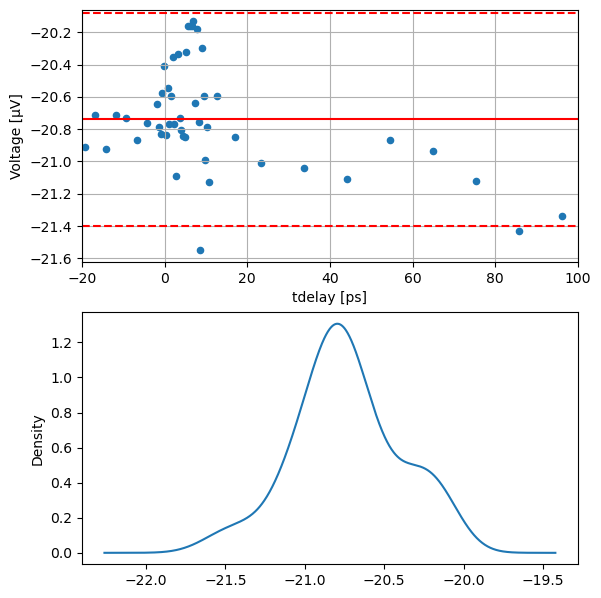

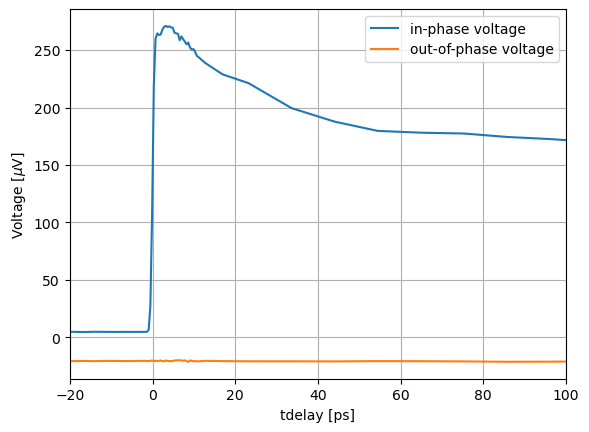

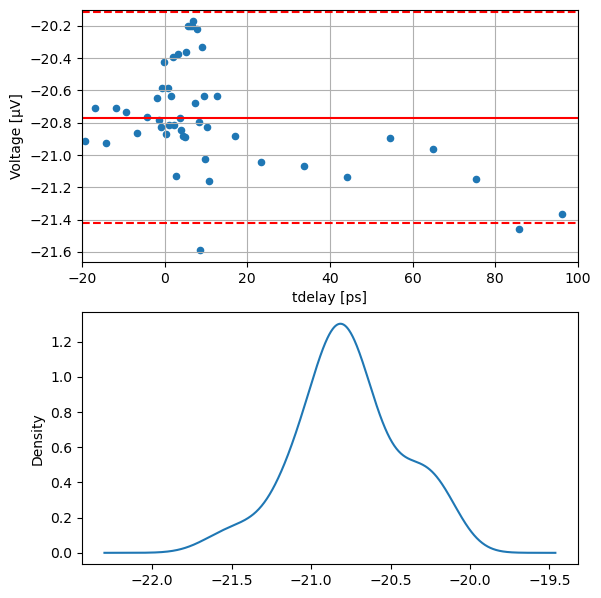

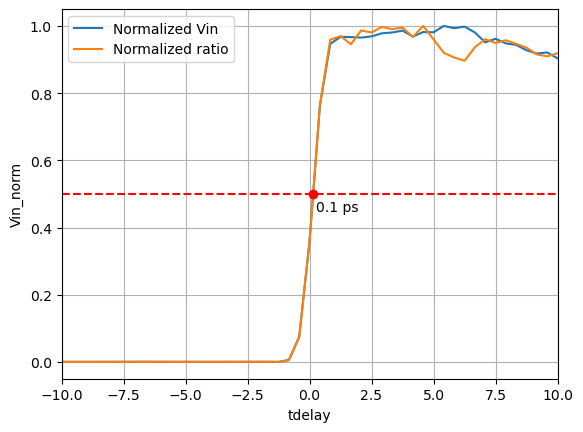

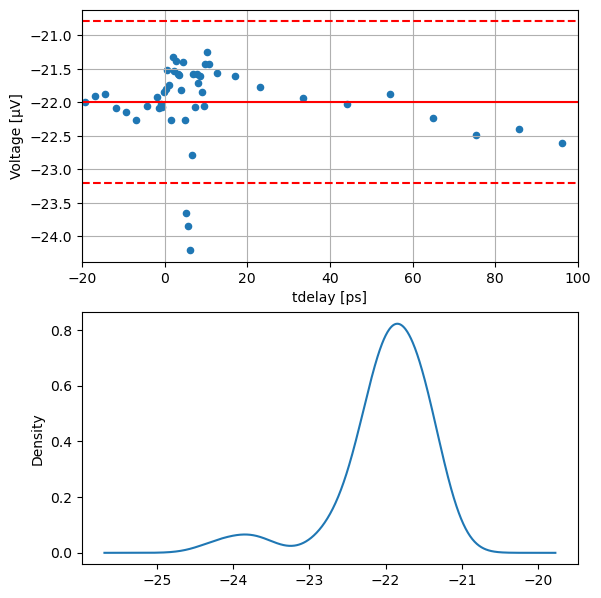

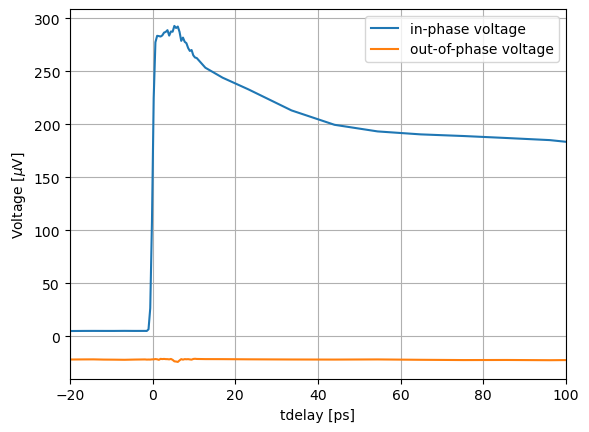

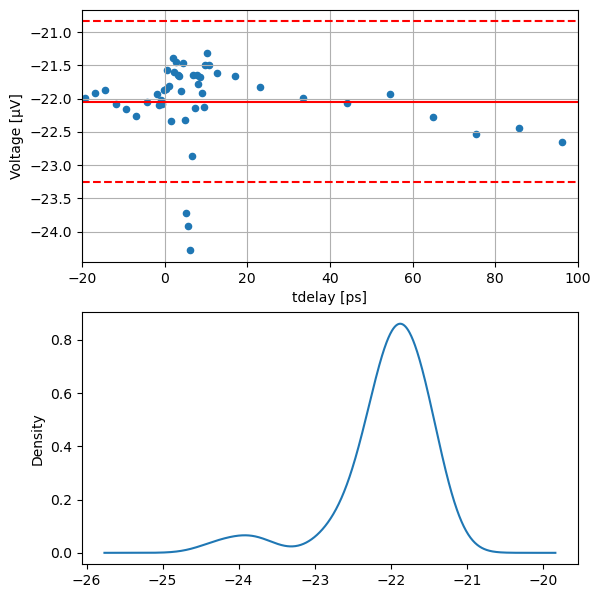

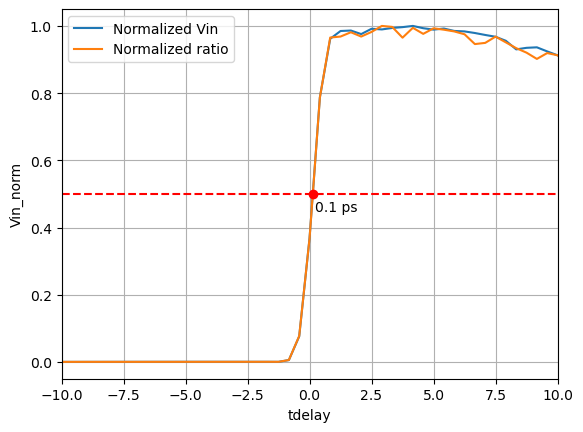

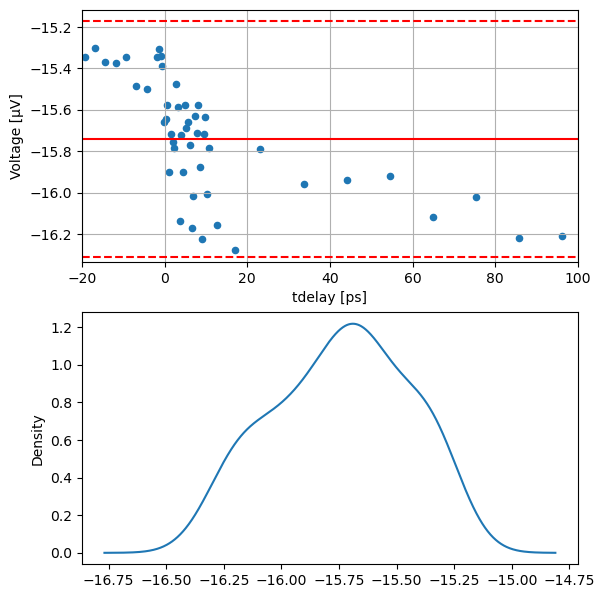

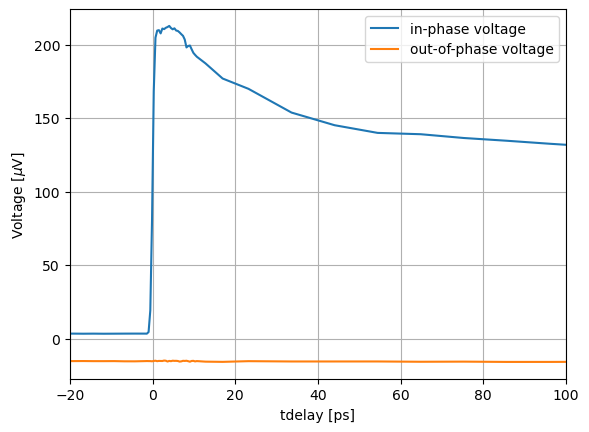

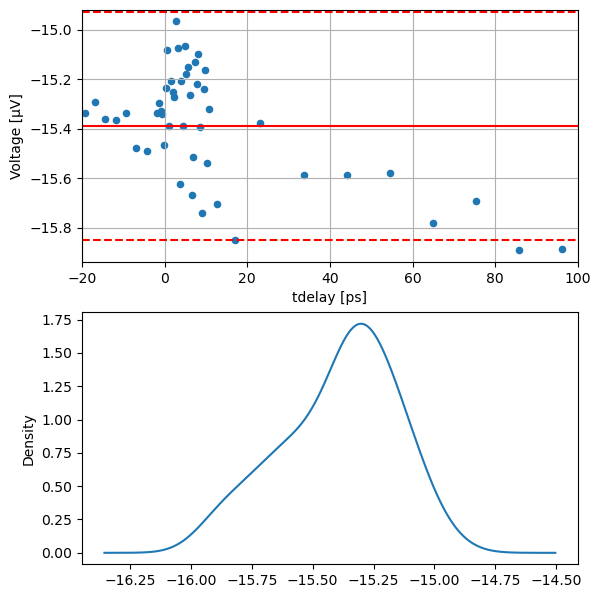

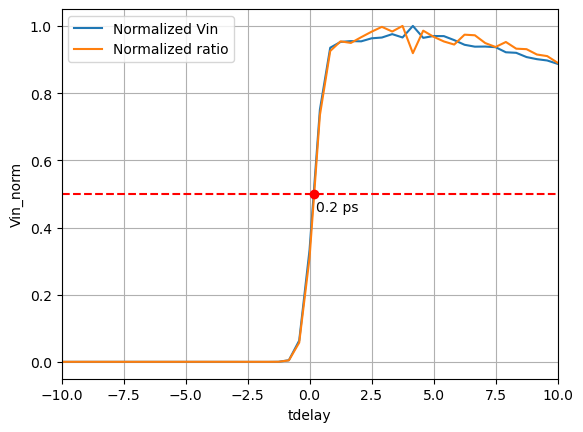

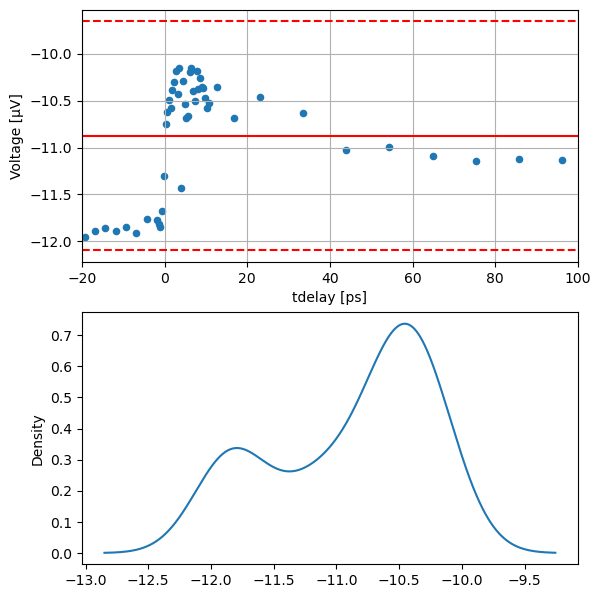

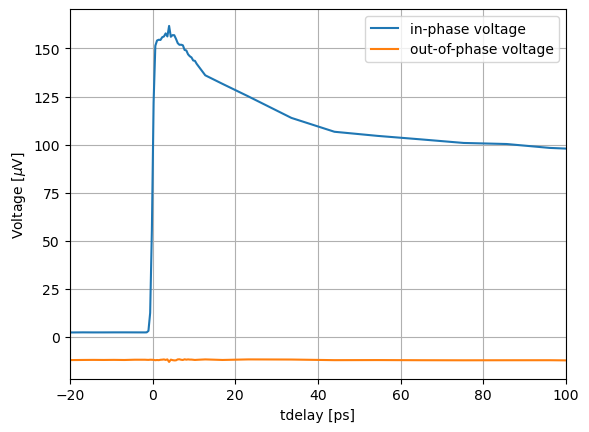

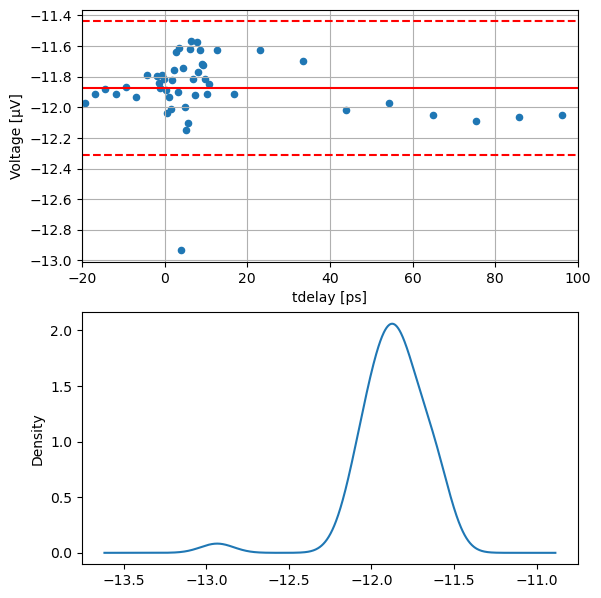

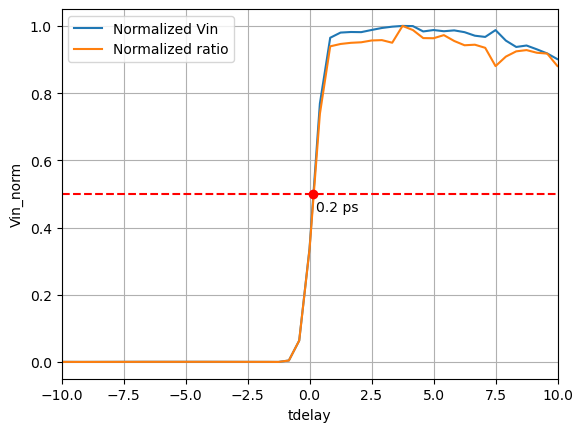

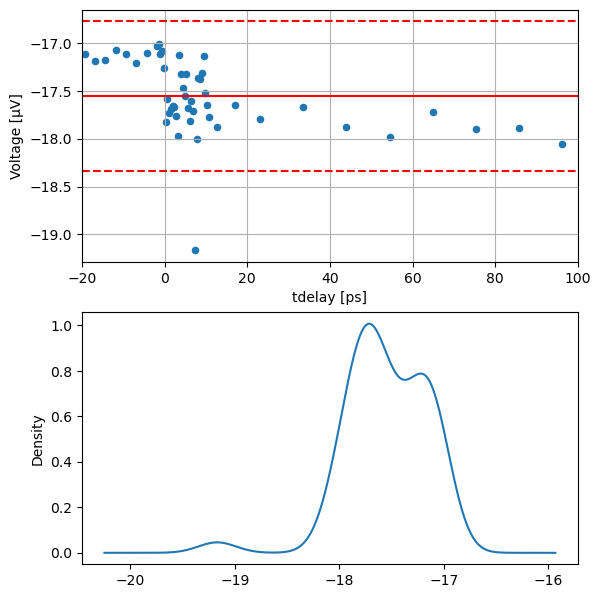

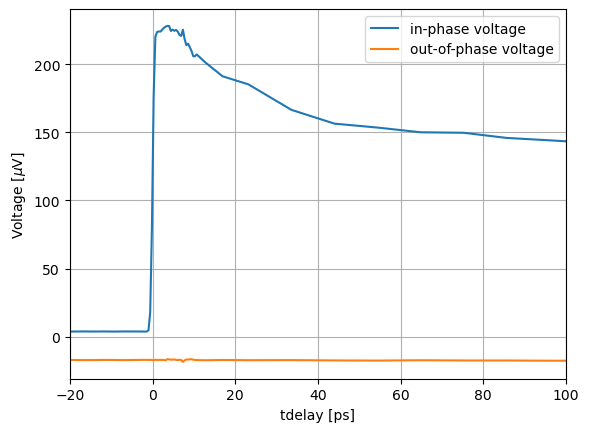

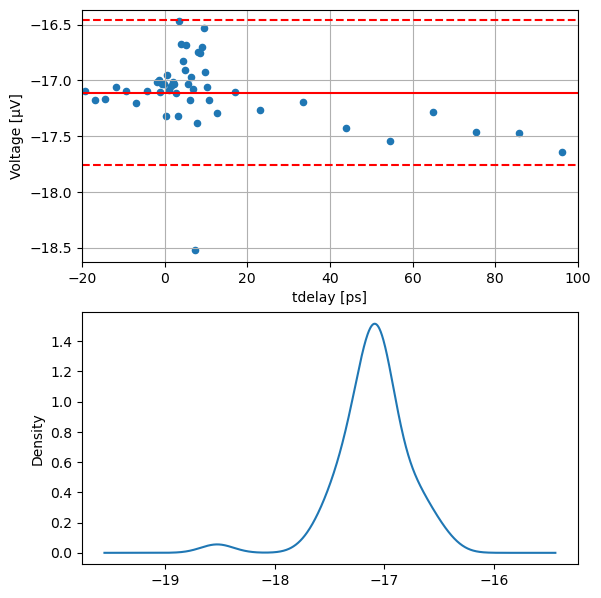

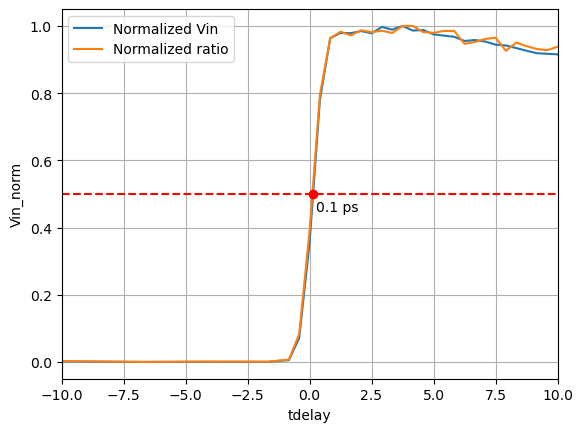

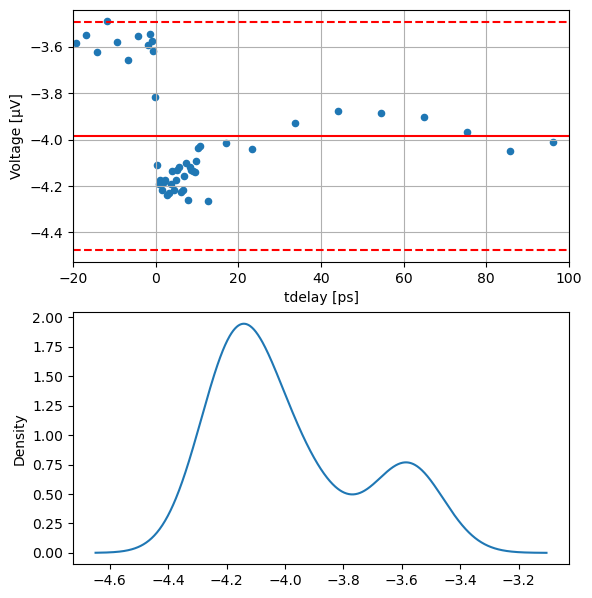

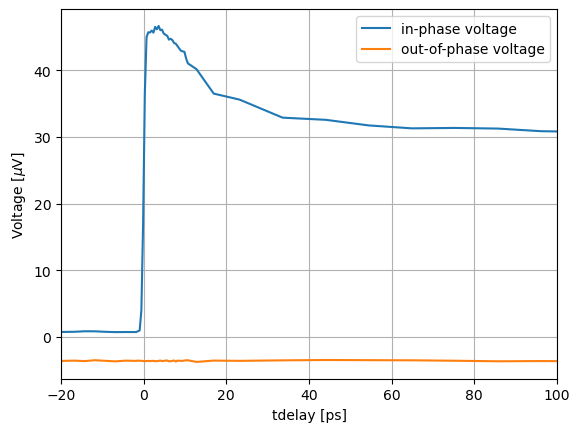

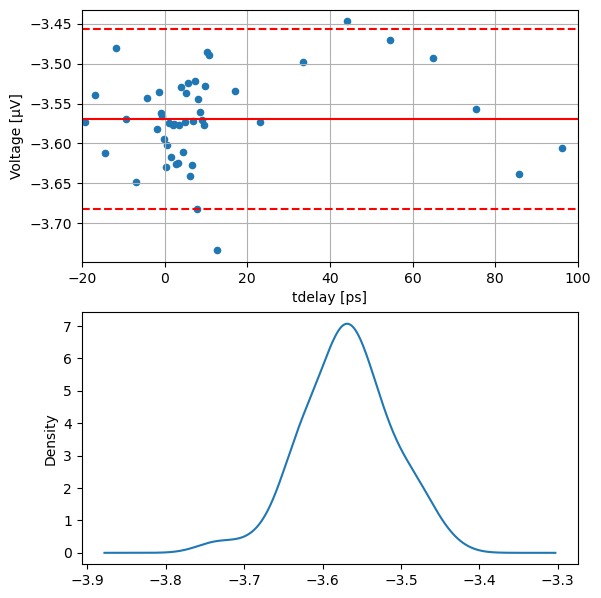

In [ ]:
# Lists for the shifted dataframe and picosecond acoustics objects

list_data_shift = []
list_del_phase  = []
list_SNR        = []

for data in list_data:
    t0_shift    = data.set_t0(plot = True)
    data.out_phase_statistics(plot = True)
    data_shift  = data.auto_phase_shift()

    #Prints the thickness of the aluminium transducer based on picosecond acoustics
    #print(data_shift.picosecond_acoustics(h = 85e-9, polarity = True, use_ratio = False, plot = True) * 1e9)

    #Prints the phase shift added so that V_out=constant around t_d=0
    print(data.phase_sol)

    #Prints the phase uncertainty
    #print(data.del_phase)

    print('---')
    data_shift.plot(-20e-12, 100e-12)
    list_data_shift.append(data_shift)
    list_del_phase.append(data.del_phase)
    list_SNR.append(data_shift.out_phase_statistics(plot = True, verbose=True))